# In this Colab box, we are importing necessary libraries for a basic machine learning workflow.
# - numpy (as np) and pandas for data manipulation
# - seaborn and matplotlib.pyplot for data visualization
# - LabelEncoder from scikit-learn to encode categorical variables
# - train_test_split for splitting data into training and testing sets
# - KNeighborsClassifier for implementing the k-nearest neighbors algorithm
# - metrics from scikit-learn for evaluating model performance
# - accuracy_score for calculating classification accuracy


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Reading the 'IRIS.csv' file into a DataFrame named 'dataset'

In [5]:
dataset = pd.read_csv('/content/IRIS.csv')

In [6]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
dataset['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
dataset.isnull().values.any()

False

In [16]:
dataset['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# Visualizing the Iris dataset using Seaborn and Matplotlib
# - sns.countplot: Displaying the count of each species in the 'species' column
# - dataset.plot(kind='scatter'): Creating a scatter plot of 'sepal_width' against 'sepal_length'
# - sns.set_style('whitegrid'): Setting the style of Seaborn plots to white grid




<Axes: xlabel='species', ylabel='count'>

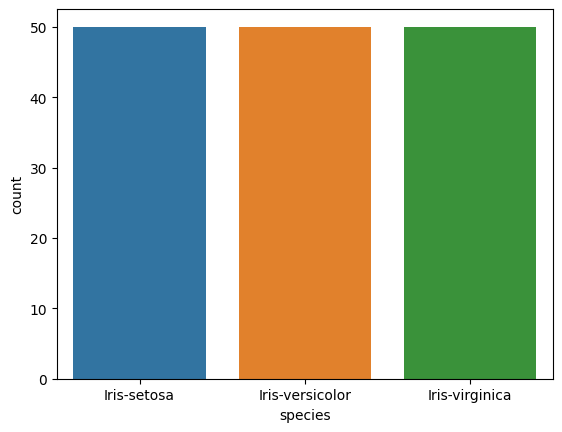

In [18]:
sns.countplot(data =dataset , x ='species')

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

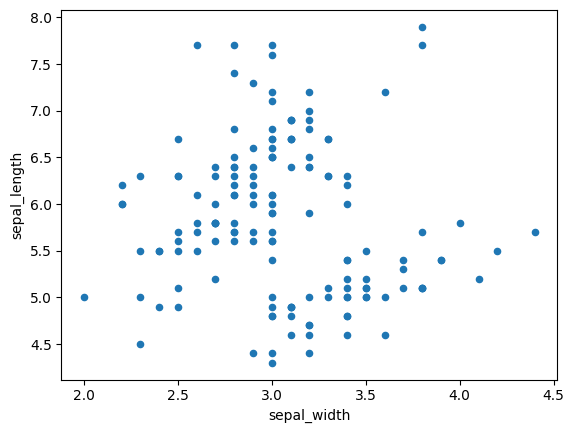

In [24]:
dataset.plot(kind='scatter' , x='sepal_width' ,y='sepal_length' )

# Creating a FacetGrid with scatter plots colored by species
# - sns.FacetGrid: Initiating a grid of subplots
# - .map(plt.scatter, 'sepal_width', 'sepal_length'): Mapping scatter plots to the grid
# - .add_legend(): Adding a legend to the scatter plot



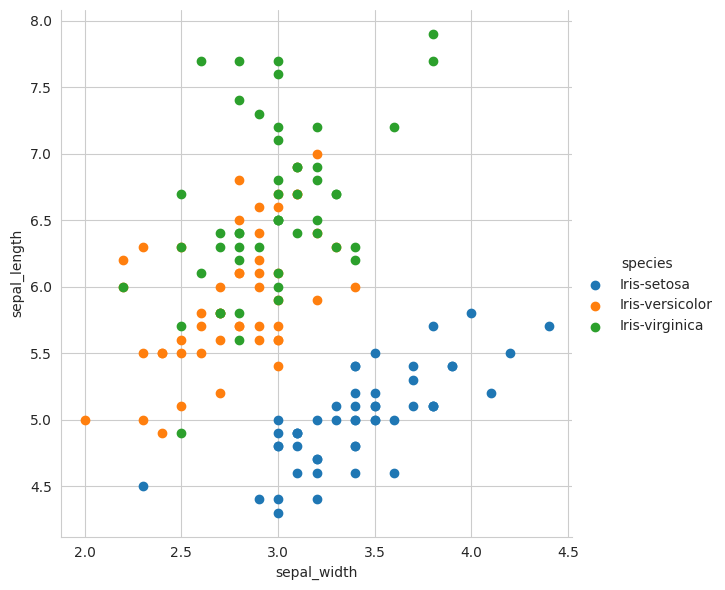

In [27]:
sns.set_style('whitegrid')
sns.FacetGrid(dataset , hue='species' , height=6).map(plt.scatter , 'sepal_width','sepal_length').add_legend()

# Creating a pair plot of features colored by species
# - sns.pairplot: Displaying pairwise relationships between features
# - hue='species': Coloring the data points based on the 'species' column
# - height=2: Setting the height of the individual plots in the pair plot

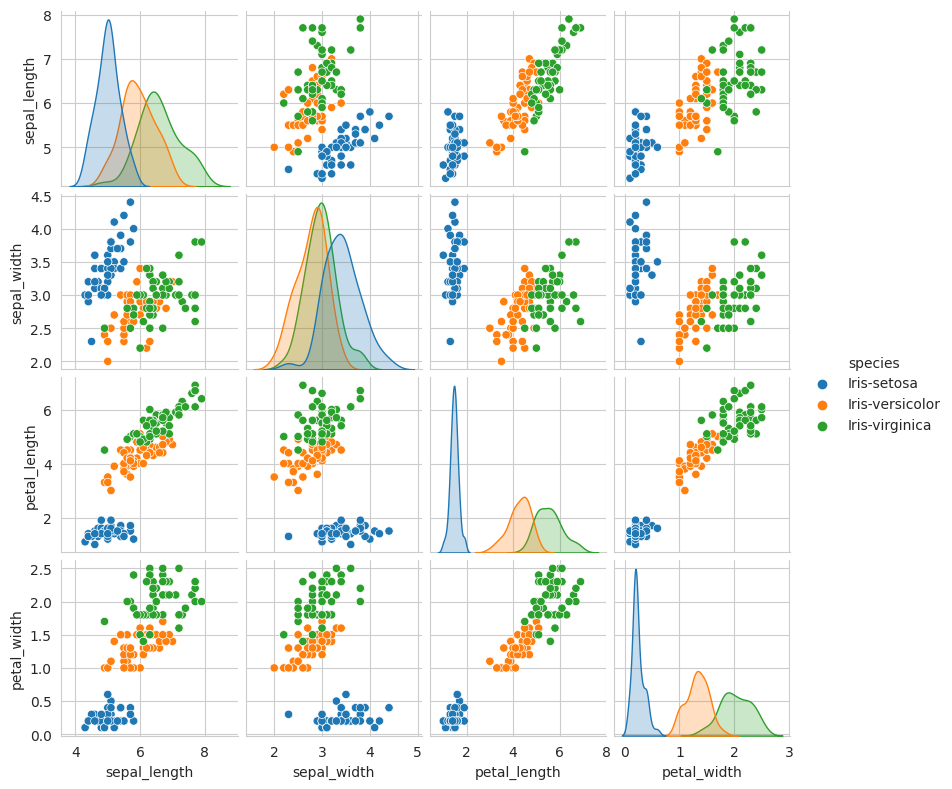

In [28]:
sns.pairplot(dataset , hue ='species' , height =2)

In [29]:
dataset.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [31]:
for column in dataset.columns:
  if dataset[column].dtype== np.number:
    continue
dataset[column]=LabelEncoder().fit_transform(dataset[column])

<ipython-input-31-ceb38b915c31>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dataset[column].dtype== np.number:


In [32]:
dataset.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]>

In [33]:
X=dataset.drop(['species'] ,axis=1)

In [35]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [36]:
y = dataset['species']

In [37]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

# Splitting the dataset into training and testing sets using train_test_split
# - X and y are assumed to be the features and labels, respectively
# - test_size=0.3: Allocating 30% of the data for testing, and 70% for training




In [38]:
X_test , X_train , y_test ,y_train =train_test_split(X , y ,test_size=0.3)

# Creating a list of k values (number of neighbors) ranging from 1 to 11
k = list(range(1, 12))

# Initializing an empty list to store accuracy scores for different k values
acc = []

# Looping through each k value and training a KNeighborsClassifier
for i in k:
    # Training the KNeighborsClassifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    
    # Predicting labels for the test set
    y_pred = knn.predict(X_test)
    
    # Calculating and appending the accuracy score for the current k value
    acc.append(metrics.accuracy_score(y_test, y_pred))

In [40]:
k = list(range(1 ,12))
acc=[]
for i in k:
  knn=KNeighborsClassifier(n_neighbors=i).fit(X_train , y_train)
  y_pred=knn.predict(X_test)
  acc.append(metrics.accuracy_score(y_test ,y_pred))

In [41]:
acc

[0.9428571428571428,
 0.8952380952380953,
 0.9142857142857143,
 0.9142857142857143,
 0.9047619047619048,
 0.9142857142857143,
 0.9238095238095239,
 0.9428571428571428,
 0.9333333333333333,
 0.9142857142857143,
 0.9238095238095239]